Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../../data/v7/Handball 3. Liga vom 23.01.2023.xlsx")

file.sheet_names

df = file.parse('3. Liga')

# drop last col comments
df = df.iloc[:, :-1]
df.columns

Index(['Heimmannschaft', 'Gastmannschaft', 'Spieltag', 'Name', 'Spielminute',
       'Differenz Pfiff 1 und 2 (in Sekunden)', 'Tore Verein', 'Tore Gegner',
       'Torwartposition (1 = vorne, 2 = hinten)',
       'Wurf erfolgreich (0= Nein, 1 = Ja, 2 = im Nachwurf)',
       'L-R-Händer (1= Rechtshänder; 2= Linkshänder)', 'Wurfrichtung (1-9)?',
       'Drucksituation?\n0 = Nein, 1 = Torwartwechsel\n2 = letzter 7 Meter gehalten\n3 = Tordifferenz =< 4 + ab 50. Spielminute\n4 = 1 + 2, 5 = 1 + 3, 6 = 2 + 3, 7 = 1 + 2 + 3, 8 = letzer 7-Meter erst im Nachwurf erfolgreich',
       'Anzahl 7-Meter im Spiel (der wievielte 7-Meter im Spiel vom Spieler)',
       'Wurfquadrant des letzten 7-Meters (1-9)',
       'letzter 7-Meter erfolgreich \n(1= ja; 0= Nein; 2 = im Nachwurf erfolgreich)?'],
      dtype='object')

Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns =[ 'homeTeam','opponentTeam','day','name','playTime',
              'whistleThrowTime','homeGoals','opponentGoals','goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection','pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TV Emsdetten,VfL Gladbeck,3.0,Holzner,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0
3,TV Emsdetten,VfL Gladbeck,3.0,Holzner,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0
4,TV Emsdetten,VfL Gladbeck,3.0,Holzner,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0


Cleaning

In [4]:
df = df.loc[:,('homeTeam','opponentTeam','throwDirection','throwSuccess','name')].copy()
# Naming correction
df['homeTeam'].replace('SV Salamander Kornwestheim.....', 'SV Salamander Kornwestheim 1894',inplace=True,regex=True)
df['opponentTeam'].replace('SV Salamander Kornwestheim.....', 'SV Salamander Kornwestheim 1894',inplace=True,regex=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)
df.loc[0, 'penaltyNo'] = 1
for i in range(1, len(df)):
    df.loc[i, 'penaltyNo'] = df.loc[i-1, 'penaltyNo']+1 if df.loc[i-1, 'homeTeam'] == df.loc[i, 'homeTeam'] and df.loc[i-1, 'opponentTeam'] == df.loc[i, 'opponentTeam'] else 1
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.sort_index(ascending=True)

,homeTeam,opponentTeam,throwDirection,throwSuccess,name,penaltyNo
0,TV Emsdetten,VfL Gladbeck,8.0,1.0,Holzner,1.0
1,TV Emsdetten,VfL Gladbeck,3.0,1.0,Holzner,2.0
2,TV Emsdetten,VfL Gladbeck,7.0,1.0,Holzner,3.0
3,TV Emsdetten,VfL Gladbeck,1.0,1.0,Holzner,4.0
4,TV Emsdetten,VfL Gladbeck,3.0,1.0,Holzner,5.0
5,TSV GWD Minden II,TV Emsdetten,7.0,0.0,Holzner,1.0
6,TSV GWD Minden II,TV Emsdetten,7.0,1.0,Holzner,2.0
7,TSV GWD Minden II,TV Emsdetten,7.0,1.0,Terhaer,3.0
8,TSV GWD Minden II,TV Emsdetten,9.0,1.0,Terhaer,5.0
9,TSV GWD Minden II,TV Emsdetten,8.0,1.0,Terhaer,6.0


In [5]:
df1 =pd.crosstab(df['penaltyNo'], df['throwDirection'], margins=True, margins_name="Total") 
df1

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,11,2,16,2,1,7,27,9,16,91
2.0,13,2,16,3,2,6,18,7,18,85
3.0,8,1,12,5,0,3,14,9,19,71
4.0,8,2,7,1,0,2,19,5,16,60
5.0,1,0,12,0,2,5,11,1,13,45
6.0,1,1,6,1,1,1,6,1,5,23
7.0,0,0,3,0,0,1,2,1,3,10
8.0,2,0,0,0,0,0,1,0,1,4
9.0,1,0,0,0,0,0,0,0,2,3


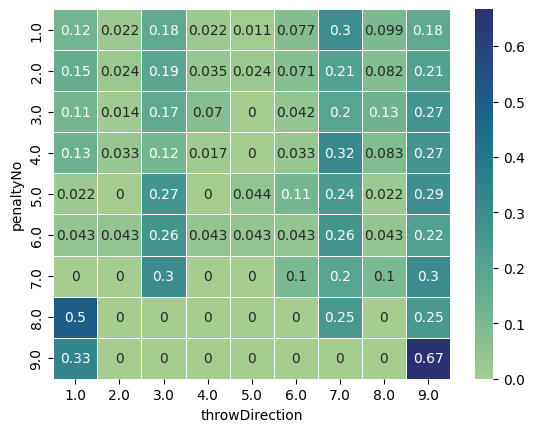

In [13]:
ax = sns.heatmap(pd.crosstab(df['penaltyNo'], df['throwDirection'], normalize='index'), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Success

In [7]:
dfs = df.loc[df['throwSuccess'] == 1]
df2 =pd.crosstab(dfs['penaltyNo'], dfs['throwDirection'], margins=True, margins_name="Total") 
df2

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,8,1,13,1,0,4,24,6,13,70
2.0,9,0,14,2,0,4,13,5,16,63
3.0,7,1,10,3,0,2,14,6,18,61
4.0,8,2,6,1,0,1,15,4,15,52
5.0,1,0,11,0,2,5,11,1,11,42
6.0,0,1,5,1,1,1,6,1,4,20
7.0,0,0,3,0,0,0,1,1,3,8
8.0,1,0,0,0,0,0,1,0,1,3
9.0,1,0,0,0,0,0,0,0,2,3


AttributeError: QuadMesh.set() got an unexpected keyword argument 'normalize'

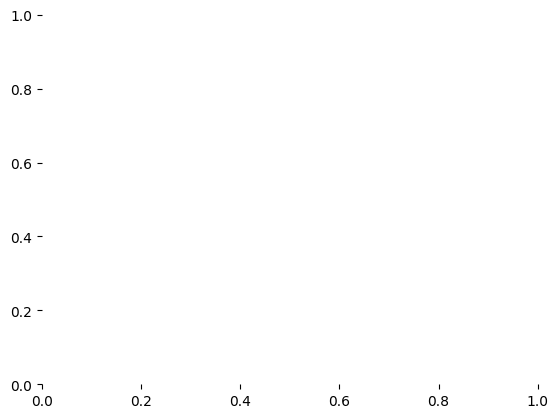

In [8]:
axs = sns.heatmap(pd.crosstab(dfs['penaltyNo'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest", normalize='columns')
#ax.xaxis.tick_top()
plt.show()

Failed

In [ ]:
dff = df.loc[df['throwSuccess'] == 0]
df3 =pd.crosstab(dff['penaltyNo'], dff['throwDirection'], margins=True, margins_name="Total") 
df3

: 

In [ ]:
axf = sns.heatmap(pd.crosstab(dff['penaltyNo'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

: 

Percentage Success

In [ ]:
relSuccess = df2/df1*100
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess

: 

Pattern

In [ ]:
grouped = df.groupby('name')
Holzner = grouped.get_group("Holzner")
Holzner

: 